**Plan**


**1. Introduction to unsupervised learning**<br>
**2. Clustering**<br>
**3. Dimensionality Reduction**<br>



# **Introduction**

Unsupervised learning is a type of machine learning where the algorithm is trained on unlabeled data. This means that the data given to the algorithm does not come with predefined labels or categories. The goal of unsupervised learning is to identify patterns, structures, or relationships within the data without any prior knowledge of what to look for. Common techniques in unsupervised learning include clustering (grouping similar data points together) and association (finding rules that describe large portions of the data).

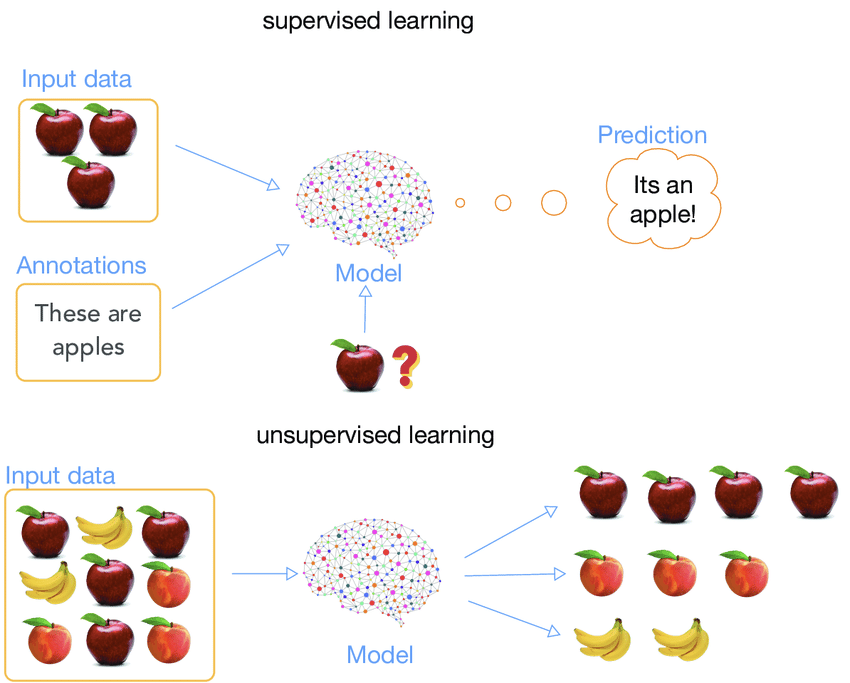

Unsupervised learning involves several key concepts:

1. **Clustering**: This is the process of grouping similar data points together. Algorithms like K-means, hierarchical clustering, and DBSCAN are commonly used for clustering tasks.

2. **Association**: This involves finding relationships between variables in a dataset. Association rule learning techniques, like Apriori and Eclat, are used to discover interesting correlations and patterns.

3. **Dimensionality Reduction**: This technique reduces the number of variables under consideration by obtaining a set of principal variables. Techniques include Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

4. **Anomaly Detection**: This is the identification of rare items, events, or observations that raise suspicions by differing significantly from the majority of the data. Techniques like Isolation Forest and one-class SVM are used for this purpose.

5. **Density Estimation**: This involves estimating the probability distribution of a dataset. Kernel Density Estimation (KDE) is a common technique used for this purpose.

6. **Feature Learning**: This is the process by which the algorithm automatically discovers the representations needed for feature detection or classification from raw data. Techniques include autoencoders and Restricted Boltzmann Machines (RBMs).

7. **Self-Organizing Maps (SOMs)**: A type of artificial neural network that is trained using unsupervised learning to produce a low-dimensional (typically two-dimensional), discretized representation of the input space of the training samples.

8. **Latent Variable Models**: These models assume that the observed data is generated from a set of unobserved (latent) variables. Examples include Gaussian Mixture Models (GMMs) and Hidden Markov Models (HMMs).

These concepts and techniques enable unsupervised learning algorithms to uncover hidden patterns and insights from unlabeled data.

# **Clustering**

Clustering is an unsupervised learning technique that groups a set of data points into clusters, where data points within the same cluster are more similar to each other than to those in other clusters. The goal of clustering is to identify natural groupings within the data based on inherent similarities. This technique relies on measuring the similarity or distance between data points and forming clusters by iteratively assigning data points and refining the clusters. Clustering is used in various applications, such as customer segmentation, image and pattern recognition, and anomaly detection, to uncover hidden patterns and insights in the data.

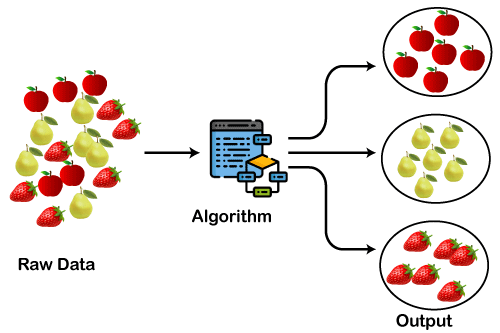

## **KMeans**

**<h2>Definition</h2>**

K-Means is a popular unsupervised clustering algorithm that partitions a dataset into K distinct, non-overlapping subsets (clusters). Each cluster is characterized by its centroid, which is the mean of the points within the cluster. The algorithm aims to minimize the within-cluster sum of squares (WCSS), which is the sum of the squared distances between each point and its cluster centroid.

**<h2>Algorithm</h2>**


1. **Initialization**:
   - Select $K$ initial centroids randomly from the dataset.

2. **Assignment**:
   - Assign each data point to the nearest centroid. This can be done using Euclidean distance:  
     $ d(x, c_i) = \sqrt{\sum_{j=1}^{n} (x_j - c_{ij})^2} $  
     where $ x $ is a data point, $ c_i $ is the centroid of cluster $ i $, and $ j $ indexes the dimensions of the data.

3. **Update**:
   - Recalculate the centroids as the mean of all points assigned to each cluster:  
     $ c_i = \frac{1}{|C_i|} \sum_{x \in C_i} x $  
     where $ C_i $ is the set of points assigned to cluster $ i $, and $|C_i| $ is the number of points in cluster \( i \).

4. **Convergence**:
   - Repeat the assignment and update steps until the centroids no longer change significantly or a predefined number of iterations is reached.

**Advantages**

- **Simplicity**: Easy to understand and implement.
- **Efficiency**: Computationally efficient with a time complexity of $ O(n \cdot k \cdot t) $, where $ n $ is the number of data points, $ k $ is the number of clusters, and $ t $ is the number of iterations.
- **Scalability**: Works well with large datasets.

**Limitations**

- **Choosing K**: The number of clusters $ K $ must be specified in advance.
- **Local Optima**: The algorithm can converge to local minima depending on the initial placement of centroids.
- **Assumption of Spherical Clusters**: K-Means assumes clusters are spherical and equally sized, which may not hold for all datasets.
- **Sensitivity to Outliers**: Outliers can disproportionately affect the cluster centroids.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Predict the cluster for each data point
clusters = kmeans.predict(data)

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plot the results
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o')
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x')
plt.title('KMeans Clustering on Iris Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

There are some methods to determine the optimal $K$

**<h2>Elbow Method for Determining the Optimal K</h2>**

The Elbow Method is a heuristic used in determining the number of clusters in a dataset for the K-Means algorithm. The idea is to run K-Means clustering on the dataset for a range of values of K and for each value of K, calculate the sum of squared distances from each point to its assigned cluster center (within-cluster sum of squares, WCSS). When plotting the WCSS against the number of clusters, the plot typically looks like an arm, and the "elbow" point is considered the optimal number of clusters.

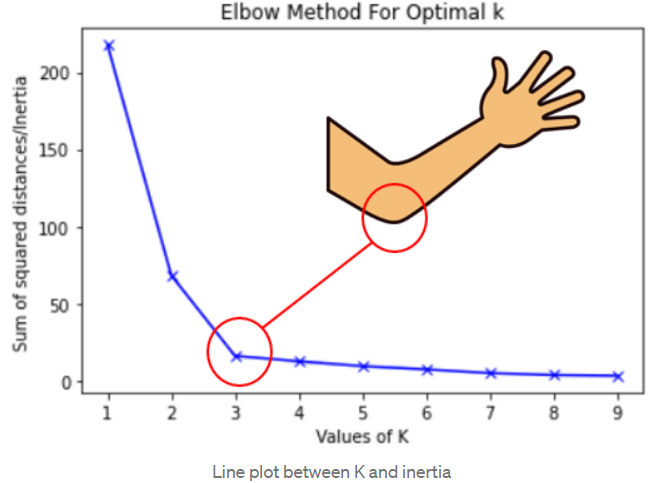

**Algorithm**

1. **Initialize**:
   - Choose a range of K values (e.g., 1 to 10).

2. **For each K value**:
   - Apply the K-Means algorithm to the data.
   - Calculate the WCSS for the resulting clusters:  
     $$
     \text{WCSS} = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - c_i\|^2
     $$
     where $ C_i $ is the set of points in cluster $ i $ and $ c_i $ is the centroid of cluster $ i $.

3. **Plot**:
   - Plot the WCSS values against the number of clusters \( K \).

4. **Determine the Elbow**:
   - Identify the point where the rate of decrease sharply slows, which appears as an "elbow" in the plot. This point is considered the optimal number of clusters.

**Mathematical Details**

The WCSS for a given cluster $ i $ is calculated as:
$$
\text{WCSS}_i = \sum_{x \in C_i} \|x - c_i\|^2
$$
The total WCSS for the clustering solution is the sum of the WCSS values for all clusters:
$$
\text{Total WCSS} = \sum_{i=1}^{K} \text{WCSS}_i
$$


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Define the range of K values to try
k_values = range(1, 11)

# Calculate WCSS for each K value
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plot the Elbow Method graph
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal K')
plt.show()

**<h2>Silhouette Method for Determining the Optimal K</h2>**

The Silhouette Method is another approach used to determine the optimal number of clusters. It measures how similar each data point is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a higher score indicates better-defined clusters.

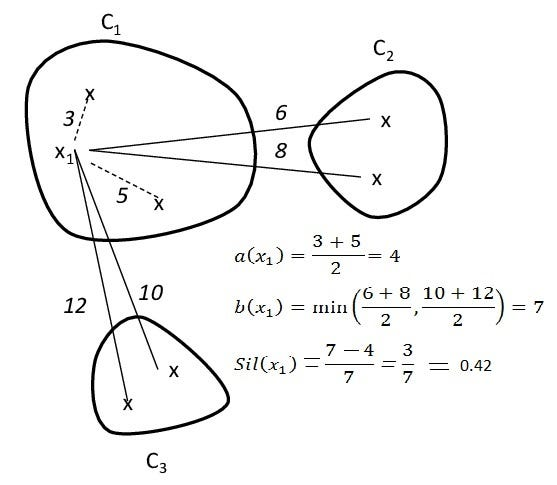

**Algorithm**

1. **Initialize**:
   - Choose a range of K values (e.g., 2 to 10).

2. **For each K value**:
   - Apply the K-Means algorithm to the data.
   - Calculate the silhouette score for each point using:
     $$
     s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
     $$
     where $ a(i) $ is the average distance from the $i$-th point to the other points in the same cluster, and $ b(i) $ is the minimum average distance from the $i$-th point to points in a different cluster.

3. **Average Silhouette Score**:
   - Compute the mean silhouette score for all data points for each K.

4. **Determine the Best K**:
   - The optimal number of clusters is the one with the highest average silhouette score.

**Mathematical Details**

For a data point $i$:
- $ a(i) $: Mean distance to other points in the same cluster.
- $ b(i) $: Mean distance to points in the nearest cluster.

Silhouette score for the $i$-th point:
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

The average silhouette score for the dataset is:
$$
\text{Silhouette Score} = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Define the range of K values to try
k_values = range(2, 11)

# Calculate silhouette scores for each K value
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method graph
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Method for Determining Optimal K')
plt.show()

## **Online k-means**

**Definition**

Online k-means is an iterative algorithm used for clustering data into k clusters in an online or streaming fashion. It updates cluster centroids incrementally as new data points arrive, making it suitable for scenarios where data is continuously generated or when batch processing is impractical.

**Algorithm Details:**

1. **Initialization:**
   - Initialize $k$ centroids randomly or using a subset of initial data points.

2. **Online Update:**
   - For each new data point $x_i$:
   $$ \text{Find the closest centroid:} \quad c_{j} = \arg\min_{c_k} \|x_i - c_k\|^2 $$
   $$ \text{Update the centroid:} \quad c_j^{new} = c_j + \eta_i (x_i - c_j) $$
   where $\eta_i$ is a learning rate or weight assigned to the new data point $x_i$, typically decreasing over time to prioritize stability.

3. **Convergence:**
   - Repeat the update process as new data points arrive, adjusting centroids until convergence criteria are met (e.g., centroids do not change significantly between iterations).

**Advantages:**
- **Scalability:** Handles large datasets and streaming data efficiently by updating centroids incrementally.
- **Real-time Adaptation:** Adapts to changes in data distribution over time.
- **Memory Efficiency:** Requires minimal memory compared to batch k-means, as it does not store all data points simultaneously.

**Limitations:**
- **Sensitivity to Order:** Initial centroids and data order can affect clustering results.
- **Convergence Issues:** May converge to local minima due to incremental updates.
- **Parameter Sensitivity:** Choice of learning rate $\eta_i$ can impact algorithm performance and convergence speed.


## **K-Medoid**

**Definition:**

The K-Medoid Algorithm is a clustering algorithm that aims to partition a dataset into K clusters, where each cluster is represented by one of the data points. Unlike K-means, which uses the mean of data points as cluster centroids, K-medoids uses actual data points as centroids, specifically choosing the most centrally located points within each cluster.

**athematical Details:**

1. **Objective Function**:
   Let $ D = \{x_1, x_2, ..., x_n\} $ be the dataset with $ n $ data points, and $ K $ be the number of clusters. The objective of K-medoid clustering is to find $ K $ clusters $ C = \{C_1, C_2, ..., C_K\} $ and $ K $ medoids $ M = \{m_1, m_2, ..., m_K\} $, such that the sum of dissimilarities between each data point and its closest medoid (also known as the cost or loss function) is minimized. The dissimilarity measure $ d(x_i, m_j) $ between a data point $ x_i $ and a medoid $ m_j $ can be any distance metric, commonly the Euclidean distance:

   $$ \min_{C, M} \sum_{j=1}^{K} \sum_{x_i \in C_j} d(x_i, m_j) $$

2. **Algorithm Steps**:
   - **Initialization**: Randomly select $ K $ data points as initial medoids.
   - **Assignment Step**: Assign each data point to the nearest medoid based on the chosen dissimilarity measure.
   - **Update Step**: For each cluster, choose the data point that minimizes the total dissimilarity as the new medoid.
   - **Repeat**: Iteratively update assignments and medoids until convergence (when no more changes in assignments occur or after a specified number of iterations).


**Advantages of K-Medoid Algorithm:**

- It is more robust to noise and outliers compared to K-means because it uses actual data points as cluster representatives.
- It can handle different types of distance metrics, making it flexible for various data types.
- It is relatively easy to interpret and visualize the resulting clusters.

**Limitations of K-Medoid Algorithm:**
- It is computationally more expensive than K-means, especially when dealing with large datasets, due to its iterative nature.
- It requires the choice of an appropriate dissimilarity measure, which may heavily influence the clustering results.
- The quality of clustering may depend on the initial selection of medoids, which can impact the final clustering outcome.


In [ ]:
# Install scikit-learn-extra library (if not already installed)
!pip install scikit-learn-extra

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=4, random_state=0)
labels = kmedoids.fit_predict(X)
centroids = kmedoids.cluster_centers_

# Plotting the clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=200, label='Centroids')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## **Fuzzy K-means**

Fuzzy K-means (or Fuzzy C-means) is an extension of the classic K-means clustering algorithm that allows for soft clustering, where each data point can belong to multiple clusters with varying degrees of membership.

**Mathematical Formulation**


Given:
- $ X = \{x_1, x_2, ..., x_n\} $ is the set of data points.
- $ c $ is the number of clusters to be formed.
- $ m $ is a fuzziness parameter, typically $ m > 1 $.

Objective:
Minimize the following objective function:

$$ J(U, V) = \sum_{j=1}^{c} \sum_{i=1}^{n} u_{ij}^m ||x_i - v_j||^2 $$

where:
- $ U = [u_{ij}] $ is the membership matrix, where $ u_{ij} $ represents the degree of membership of data point $ x_i $ in cluster $ j $ ($ 0 \leq u_{ij} \leq 1 $, $ \sum_{j=1}^{c} u_{ij} = 1 $).
- $ V = \{v_1, v_2, ..., v_c\} $ are the cluster centroids.

Steps:
1. Initialize $ V $ (cluster centroids).
2. Update $ U $ using:
   $$ u_{ij} = \left( \sum_{k=1}^{c} \left( \frac{||x_i - v_j||}{||x_i - v_k||} \right)^{\frac{2}{m-1}} \right)^{-1} $$
3. Update $ V $ using:
   $$ v_j = \frac{\sum_{i=1}^{n} u_{ij}^m x_i}{\sum_{i=1}^{n} u_{ij}^m} $$
4. Repeat steps 2 and 3 until convergence (typically when $ U $ and $ V $ do not change significantly or after a fixed number of iterations).



**Advantages of Fuzzy K-means**

- **Soft Clustering**: Allows data points to belong to multiple clusters simultaneously, which can be more flexible in real-world data scenarios where boundaries between clusters are not clear-cut.
- **Robust to Noise**: Due to the soft membership assignment, it can handle noisy data better than traditional K-means.
- **Versatility**: Can be applied to a wide range of data types and shapes of clusters.

**Limitations of Fuzzy K-means**

- **Sensitive to Initialization**: Results can vary depending on initial cluster centroids.
- **Computational Complexity**: Requires more computation compared to traditional K-means, especially with higher values of \( m \).
- **Interpretability**: Membership degrees may not be straightforward to interpret compared to hard cluster assignments.


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)

# Fuzzy K-means implementation
def fuzzy_kmeans(X, c, m=2, max_iter=100, tol=1e-4):
    n_samples, n_features = X.shape
    # Initialize centroids
    centroids = X[np.random.choice(n_samples, c, replace=False)]

    for _ in range(max_iter):
        # Compute distances from centroids
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        # Compute membership matrix U
        membership = 1 / distances**(2 / (m - 1))
        membership = (membership.T / np.sum(membership, axis=1)).T
        # Update centroids
        centroids_new = np.dot(membership**m, X) / np.sum(membership**m, axis=0)[:, np.newaxis]

        # Check convergence
        if np.linalg.norm(centroids_new - centroids) < tol:
            break

        centroids = centroids_new

    return centroids, membership

# Applying fuzzy k-means
c = 3  # Number of clusters
centroids, membership = fuzzy_kmeans(X, c)

# Hard assignment (choosing the most probable cluster)
labels = np.argmax(membership, axis=1)

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='r', label='Centroids')
plt.title('Fuzzy K-means Clustering')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## **K-Modes**

**Definition**

K-Modes is a clustering algorithm designed for categorical data. Unlike K-Means, which works with numerical data and uses Euclidean distance, K-Modes operates with categorical variables and uses a dissimilarity measure specifically tailored for categorical data.

**Mathematical Details:**

Given a dataset $X = \{x_1, x_2, ..., x_n\}$ where each $x_i$ is a categorical vector of length $p$, the K-Modes algorithm aims to partition the dataset into $k$ clusters such that the dissimilarity (distance) within clusters is minimized. The dissimilarity between two categorical data points is often measured using the Hamming distance or other specific measures suitable for categorical data.

The algorithm proceeds as follows:

1. **Initialization**: Randomly initialize $k$ cluster centroids.
   
2. **Assignment**: Assign each data point to the nearest cluster centroid based on the dissimilarity measure (e.g., Hamming distance).

3. **Update**: Update each cluster centroid by choosing the mode (most frequent category) among the data points assigned to that cluster.

4. **Iteration**: Repeat the assignment and update steps until convergence, where the assignment of data points to clusters no longer changes significantly or a maximum number of iterations is reached.

The objective function in K-Modes can be defined as minimizing the total dissimilarity:

$$ J = \sum_{i=1}^{n} d(x_i, c_{j_i}) $$

where:
- $x_i$ is a data point in the dataset $X$,
- $c_{j_i}$ is the centroid of the cluster to which $x_i$ is assigned,
- $d(x_i, c_{j_i})$ is the dissimilarity (distance) measure between $x_i$ and $c_{j_i}$.



**Advantages of K-Modes Algorithm**

- **Handles categorical data**: Unlike many clustering algorithms designed for numerical data, K-Modes is specifically tailored for categorical variables, making it suitable for datasets with non-numeric attributes.
  
- **Interpretability**: Clusters formed by K-Modes are easily interpretable since they consist of categorical attributes, which are often directly understandable (e.g., demographics, preferences).

- **Robust to noise**: K-Modes can handle noise and outliers well in categorical data, as it focuses on mode (most frequent category) rather than mean values, which can be skewed by outliers in numerical data.

**Limitations of K-Modes Algorithm**

- **Sensitive to initialization**: Like K-Means, K-Modes can produce different results depending on initial centroid selection, which can affect the final clustering outcome.

- **Scalability**: As with many clustering algorithms, the scalability of K-Modes can be an issue with large datasets due to its iterative nature and computational complexity.


In [ ]:
# Install kmodes package if not already installed
# !pip install kmodes

from kmodes.kmodes import KModes
import pandas as pd

# Example categorical dataset (can be replaced with your own dataset)
data = {
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'age_group': ['18-24', '25-34', '18-24', '35-44', '25-34'],
    'education': ['Bachelor', 'Master', 'High School', 'PhD', 'Bachelor']
}

df = pd.DataFrame(data)

# Initialize KModes with number of clusters
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)

# Fit the KModes model to data
clusters = km.fit_predict(df)

# Print cluster centroids of the trained model
print("Cluster centroids:")
print(km.cluster_centroids_)

# Print labels of the data points
print("\nLabels:")
print(clusters)


**Updating Cluster Centroids in K-Modes**

In K-Modes, the cluster centroid for each cluster is updated by choosing the mode (most frequent category) for each attribute among the data points assigned to that cluster. This means that the centroid for a cluster is a vector where each element is the most frequent category of the corresponding attribute among all the data points in that cluster.

**Why the Centroid is Not a Data Point**

You're correct that the centroid, as defined in K-Modes, may not be an actual data point from the dataset. Instead, it is a synthetic point that represents the most common category for each attribute within the cluster. This synthetic point serves as a central reference for assigning points to clusters in the next iteration.

**How to Use the Synthetic Centroid in Subsequent Iterations**

In subsequent iterations, the synthetic centroid is used to assign each data point to the nearest cluster. The distance (dissimilarity) between a data point and a synthetic centroid is calculated in the same way as it was initially: by counting the number of mismatches between the data point's attributes and the centroid's attributes.

**Detailed Example**

Let's go through a step-by-step example to illustrate this process:

#### Step 1: Initial Centroids
Assume we have a dataset with three categorical attributes:

```python
data = [
    ['Male', '18-24', 'Bachelor'],
    ['Female', '25-34', 'Master'],
    ['Male', '18-24', 'High School'],
    ['Female', '35-44', 'PhD'],
    ['Male', '25-34', 'Bachelor']
]
```

Suppose we randomly initialize two centroids (k=2):

- Centroid 1: ['Male', '18-24', 'Bachelor']
- Centroid 2: ['Female', '25-34', 'Master']

**Step 2: Assign Points to Nearest Centroid**

Calculate the dissimilarity (e.g., Hamming distance) for each data point to each centroid and assign the points:

- ['Male', '18-24', 'Bachelor'] -> Centroid 1 (distance: 0)
- ['Female', '25-34', 'Master'] -> Centroid 2 (distance: 0)
- ['Male', '18-24', 'High School'] -> Centroid 1 (distance: 1)
- ['Female', '35-44', 'PhD'] -> Centroid 2 (distance: 2)
- ['Male', '25-34', 'Bachelor'] -> Centroid 1 (distance: 1)

**Step 3: Update Centroids**

Cluster 1 contains:
- ['Male', '18-24', 'Bachelor']
- ['Male', '18-24', 'High School']
- ['Male', '25-34', 'Bachelor']

Mode for each attribute:
- Gender: 'Male'
- Age Group: '18-24'
- Education: 'Bachelor'

New Centroid 1: ['Male', '18-24', 'Bachelor']

Cluster 2 contains:
- ['Female', '25-34', 'Master']
- ['Female', '35-44', 'PhD']

Mode for each attribute:
- Gender: 'Female'
- Age Group: No mode (tie), typically resolved by arbitrary choice or preference (let's assume '25-34')
- Education: No mode (tie), typically resolved by arbitrary choice or preference (let's assume 'Master')

New Centroid 2: ['Female', '25-34', 'Master']


## **Hierarchical or Agglomerative Clustering**

Hierarchical clustering is an unsupervised learning method that builds a hierarchy of clusters by iteratively merging or splitting existing clusters based on their similarities. This method starts by treating each data point as its own cluster and progressively merges the closest pairs of clusters until all points are contained within a single cluster or a specified number of clusters is reached. The result is a dendrogram, a tree-like diagram that shows the order and distances of merges, which can be used to decide the number of clusters by cutting the tree at the desired level.

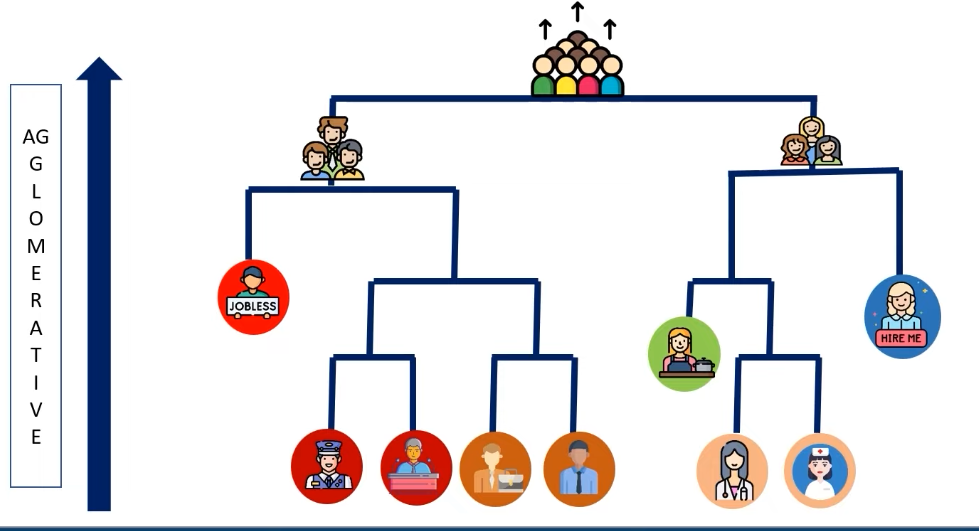

**Distance Metrics**

In hierarchical clustering, several distance metrics can be used to measure the similarity or dissimilarity between clusters:

1. **Euclidean Distance**:
   $$
   d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
   $$

2. **Manhattan Distance**:
   $$
   d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
   $$

3. **Cosine Similarity**:
   $$
   \text{cosine_similarity}(x, y) = \frac{\sum_{i=1}^{n} x_i y_i}{\sqrt{\sum_{i=1}^{n} x_i^2} \sqrt{\sum_{i=1}^{n} y_i^2}}
   $$

4. **Minkowski Distance**:
   $$
   d(x, y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{1/p}
   $$

5. **Hamming Distance**:
   $$
   d(x, y) = \sum_{i=1}^{n} \mathbb{I}(x_i \neq y_i)
   $$
   where $\mathbb{I}$ is the indicator function that returns 1 if $x_i \neq y_i$ and 0 otherwise.

**Linkage Criteria**

Different linkage criteria determine how the distance between clusters is computed:

1. **Single Linkage (Minimum Linkage)**:
   $$
   d(A, B) = \min \{ d(a, b) \mid a \in A, b \in B \}
   $$

2. **Complete Linkage (Maximum Linkage)**:
   $$
   d(A, B) = \max \{ d(a, b) \mid a \in A, b \in B \}
   $$

3. **Average Linkage**:
   $$
   d(A, B) = \frac{1}{|A| \cdot |B|} \sum_{a \in A} \sum_{b \in B} d(a, b)
   $$

4. **Centroid Linkage**:
   $$
   d(A, B) = d(\bar{a}, \bar{b})
   $$
   where $\bar{a}$ and $\bar{b}$ are the centroids of clusters $A$ and $B$ respectively.

5. **Ward's Linkage**:
   $$
   d(A, B) = \sqrt{\frac{|B| + |C|}{T} d^2(A, C) + \frac{|A| + |C|}{T} d^2(B, C) - \frac{|C|}{T} d^2(A, B)}
   $$
   where $T = |A| + |B| + |C|$.

**Algorithm**

1. **Initialize**: Assign each data point to its own cluster.
2. **Compute Distances**: Calculate the distance between all pairs of clusters.
3. **Merge Clusters**: Identify and merge the pair of clusters with the smallest distance.
4. **Update Distances**: Recompute the distances between the new cluster and all remaining clusters.
5. **Repeat**: Continue merging clusters until the desired number of clusters is reached or all points are in a single cluster.

**Advantages**

- Does not require the number of clusters to be specified in advance.
- Produces a comprehensive dendrogram that provides insights into the data structure.
- Can handle any shape or size of clusters.

**Limitations**

- Computationally expensive, especially for large datasets.
- Sensitive to noise and outliers.
- The choice of distance metric and linkage criteria can significantly affect the results.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate sample data
X, y = make_blobs(n_samples=150, centers=3, random_state=42)

# Perform hierarchical clustering
linked = linkage(X, 'ward')

# Create dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = agg_cluster.fit_predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## **MiniBatchKMeans**

MiniBatchKMeans is a variant of the K-means clustering algorithm, designed to work with large datasets more efficiently by using mini-batches of the data to update cluster centroids iteratively. It is particularly useful when dealing with large datasets that do not fit into memory, as it processes chunks (mini-batches) of the data at a time rather than the entire dataset.

**Mathematical Details**

1. **Objective Function (Cost Function)**:
   The objective of MiniBatchKMeans is to minimize the sum of squared distances from each data point to its nearest cluster center. Given $X = \{x_1, x_2, ..., x_n\}$ as the dataset and $C = \{c_1, c_2, ..., c_k\}$ as the set of cluster centroids, the objective function \(J\) is defined as:
   $$ J = \sum_{i=1}^{n} \min_{c_j \in C} \|x_i - c_j\|^2 $$
   where $\|x_i - c_j\|$ denotes the Euclidean distance between data point $x_i$ and cluster centroid $c_j$.

2. **Algorithm**:
   - Initialize $k$ cluster centroids randomly.
   - For each mini-batch of data:
     - Assign each data point to its nearest centroid.
     - Update centroids using a weighted average of the points in the mini-batch.
   - Repeat until convergence (centroids do not change significantly or a maximum number of iterations is reached).

**Advantages**

- **Efficiency**: MiniBatchKMeans is faster than traditional K-means because it updates centroids using mini-batches, making it suitable for large datasets.
- **Scalability**: It can handle datasets that do not fit into memory since it processes data in small batches.
- **Memory Efficiency**: It requires less memory compared to batch K-means, as it does not store the entire dataset in memory at once.

**Limitations**

- **Quality of Clusters**: The clusters produced by MiniBatchKMeans may not be as good as those from batch K-means, especially with smaller batch sizes or datasets with high variance.
- **Sensitivity to Parameters**: Performance can vary with different choices of parameters such as batch size, number of clusters $k$, and convergence criteria.
- **Convergence**: It may converge to a local minimum rather than the global minimum due to its stochastic nature.

In [ ]:
# Import necessary libraries
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate some synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, random_state=42)

# Initialize MiniBatchKMeans
batch_size = 100
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=batch_size, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Predict cluster labels
labels = kmeans.predict(X)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=300, c='r', label='Centroids')
plt.title('MiniBatchKMeans Clustering')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## **BIRCH**

**Definition**

BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is a hierarchical clustering algorithm designed for large datasets that do not fit into memory. It incrementally and dynamically clusters incoming multi-dimensional data points and maintains a compact summary of the data, making it memory-efficient. BIRCH operates in two phases: (1) building a tree-like data structure called CF-tree (Clustering Feature tree) from the input data, and (2) clustering the data based on the CF-tree.

**Algorithm with Mathematical Details:**

**Phase 1: Building CF-tree**

1. **Initialization**:
   - Each incoming data point is represented by a feature vector $X_i$.
   - Initialize the CF-tree with parameters like the maximum number of entries per node (B), maximum number of nodes (T), and threshold values for splitting nodes.

2. **Insertion**:
   - For each data point $X_i$, traverse the CF-tree to find the leaf node where $X_i$ can be inserted.
   - Update the statistics (centroid, variance, number of points) of the leaf node.
   - If inserting $X_i$ causes the leaf node to exceed the threshold values, split the node.

3. **Node Splitting**:
   - When a leaf node is split, distribute its entries into two new nodes.
   - Adjust the CF-tree structure to maintain balanced nodes.

**Phase 2: Clustering**

1. **Global Clustering**:
   - Traverse the CF-tree to merge similar clusters based on thresholds and proximity measures defined during tree construction.
   - Output the final clusters.



**Advantages of BIRCH:**

- **Scalability**: Suitable for large datasets because it processes data incrementally and maintains a compact summary.
- **Memory Efficiency**: Uses a hierarchical structure (CF-tree) to store data summaries, reducing memory usage.
- **Fast Clustering**: Once the CF-tree is built, clustering new data points is efficient.
- **Handles Noisy Data**: Can handle noise and outliers effectively due to its structure and merging strategy.

**Limitations of BIRCH:**

- **Sensitive to Parameters**: Performance heavily depends on choosing appropriate parameters like B, T, and thresholds.
- **Sensitive to Order**: The order of data points can affect tree structure and clustering results.
- **Not Suitable for Arbitrary Shapes**: Primarily designed for spherical or elliptical clusters; may struggle with complex shapes.


In [ ]:
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=1000, centers=3, cluster_std=1.0, random_state=42)

# Apply BIRCH clustering
brc = Birch(branching_factor=50, n_clusters=3, threshold=0.5, compute_labels=True)
brc.fit(X)

# Predict cluster labels
cluster_labels = brc.predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='.')
plt.title('BIRCH Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## **DBSCAN**

DBSCAN is a density-based clustering algorithm that identifies clusters in a dataset based on two parameters: epsilonepsilon ($\epsilon$) and MinPts. It groups together points that are closely packed together (dense regions) and marks points that lie alone in low-density regions as outliers. DBSCAN does not require the user to specify the number of clusters beforehand, making it particularly useful for datasets where the number of clusters is not known a priori.

**Algorithm:**

**Parameters:**
- **$ \epsilon $** ($\epsilon$): Maximum distance between two points to be considered neighbors.
- **MinPts**: Minimum number of points required to form a dense region (core point).

**Steps:**

1. **Initialization**:
   - Initialize all points as unvisited.

2. **Core Point Identification**:
   - For each point $p$ in the dataset $D$:
     - Compute the neighborhood \( N_\epsilon(p) \), which includes all points within distance $ \epsilon $ from $ p $.
     - If $ |N_\epsilon(p)| \geq \text{MinPts} $, mark $ p $ as a core point.

3. **Cluster Expansion**:
   - For each core point $ p $:
     - If $ p $ has not been visited yet:
       - Initialize a new cluster.
       - Perform a depth-first search (DFS) to find all points density-reachable from $ p $ (directly: points in the core point of $p$ or indirectly: points that are in core point of a core point of $p$).
       - Assign all these points to the same cluster.

4. **Noise Point Handling**:
   - Any point that is not visited during the process and does not belong to any cluster is considered noise.



**Mathematical Details:**

- Let $ D $ be the dataset of points $ \{p_1, p_2, \ldots, p_n\} $.
- $ \epsilon $ is the maximum radius of the neighborhood.
- MinPts is the minimum number of points in a neighborhood to define a core point.
- Core Point: $ p $ is a core point if $ |N_\epsilon(p)| \geq \text{MinPts} $, where $ N_\epsilon(p) $ is the neighborhood of $ p $ within distance $ \epsilon $.
- Directly density-reachable: $ p $ is directly density-reachable from $ q $ if $ p \in N_\epsilon(q) $ and $q$ is a core point.
- Density-reachable: $ p $ is density-reachable from $ q $ if there is a chain of points $ p_1, p_2, \ldots, p_n $ such that $ p_1 = q $, $ p_n = p $, and $ p_{i+1} $ is directly density-reachable from $ p_i $.
- Cluster: A cluster is a maximal set of density-connected points.
- Noise: Points that do not belong to any cluster.


**Advantages:**

- **Robust to Noise**: Can handle outliers and noise in the data effectively by designating them as noise points.
- **Does Not Require Predefined Number of Clusters**: Can find clusters of arbitrary shapes and sizes without prior knowledge of the number of clusters.
- **Handles Clusters of Different Densities**: Can identify clusters of varying densities within the dataset.

**Limitations:**

- **Sensitive to Parameters**: Performance heavily depends on choosing appropriate values for \( \epsilon \) and MinPts.
- **Difficulty with High-Dimensional Data**: Becomes less effective as the number of dimensions increases due to the curse of dimensionality.
- **Cluster Shape Identification**: May struggle with clusters of varying densities and non-convex shapes.


In [ ]:
# Importing necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Using only first two features for simplicity

# Parameters for DBSCAN
epsilon = 0.5
min_samples = 5

# Initialize DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')

# Highlighting noise points (cluster -1)
noise_mask = np.where(clusters == -1)
plt.scatter(X[noise_mask, 0], X[noise_mask, 1], marker='x', color='red', label='Noise')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()


## **Spectral Clustering**

Spectral Clustering is a clustering technique that uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in fewer dimensions. It leverages the spectral (eigenvalue) decomposition of the affinity matrix between data points. The technique is powerful for clustering data that is not linearly separable and can uncover clusters of arbitrary shapes.

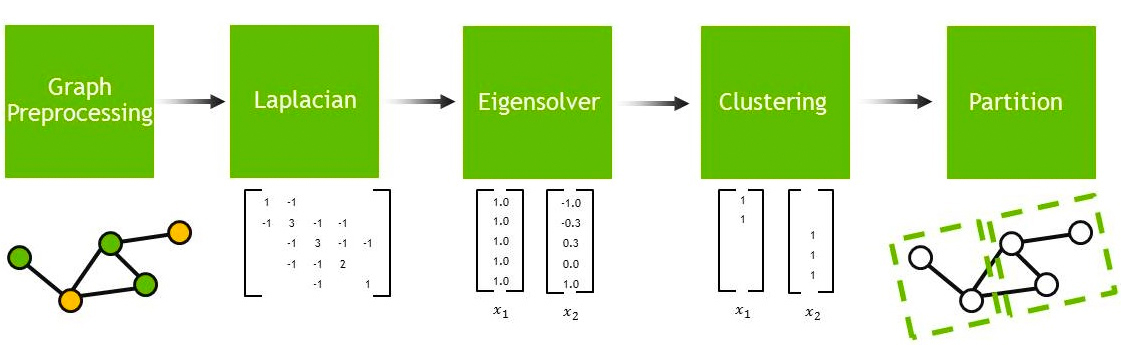

**Algorithm**

The algorithm for Spectral Clustering can be summarized as follows:

1. **Construct Affinity Matrix**: Define a similarity measure between data points and construct an $ n \times n $ affinity matrix $ A $, where $ n $ is the number of data points. Common choices include the Gaussian kernel $ A_{ij} = \exp(-\frac{\|x_i - x_j\|^2}{\sigma^2}) $ or k-nearest neighbors.

2. **Compute Laplacian Matrix**: Construct the Laplacian matrix $ L $ from the affinity matrix $A$:
   $$ L = D - A $$
   where $D$ is the degree matrix, diagonal matrix with $ D_{ii} = \sum_j A_{ij} $.

3. **Compute Eigenvalues and Eigenvectors**: Compute the eigenvectors corresponding to the $ k $ smallest eigenvalues of the Laplacian matrix $ L $ to form matrix $ X $.

4. **Cluster Eigenvectors**: Use a clustering algorithm (e.g., K-means) on the rows of $ X $ to partition the data into $ k $ clusters.



**Advantages**

- **Flexibility**: Can identify clusters of complex shapes and sizes.
- **Effective**: Handles non-linear boundaries well.
- **Scalability**: Works with large datasets, especially using sparse matrix operations.
- **Insensitivity to Outliers**: Often robust to outliers due to the use of affinity matrix.

**Limitations**

- **Parameter Sensitivity**: Choice of parameters like the number of clusters $ k $ and similarity measure can impact results.
- **Computational Complexity**: Computing the affinity matrix and eigendecomposition can be computationally expensive for large datasets.
- **Interpretability**: Clusters may not always have straightforward interpretations, especially in high-dimensional spaces.



In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

# Generate synthetic data (moon-shaped clusters)
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply Spectral Clustering
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
sc_labels = sc.fit_predict(X)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Clusters')
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=sc_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Spectral Clustering')
plt.show()

# Evaluate clustering performance (using Adjusted Rand Index)
ari = adjusted_rand_score(y, sc_labels)
print(f"Adjusted Rand Index: {ari}")


## **Gaussian Mixture**

**Definition:**

The Gaussian Mixture Model (GMM) is a probabilistic model that assumes all data points are generated from a mixture of several Gaussian distributions with unknown parameters. In simpler terms, it represents a composite distribution wherein each component Gaussian represents a cluster.

**Mathematical Details:**

1. **Mixture Model Formula:**
   Let $ X = \{x_1, x_2, ..., x_N\} $ denote the observed data points. The probability density function (pdf) of a GMM is given by:
   $$ p(x | \theta) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x | \mu_k, \Sigma_k) $$
   where:
   - $ \theta = \{\pi_k, \mu_k, \Sigma_k\}_{k=1}^{K} $ are the parameters of the model,
   - $ \pi_k $ is the mixing coefficient of the $ k $-th Gaussian component (satisfies $ 0 \leq \pi_k \leq 1 $ and $ \sum_{k=1}^{K} \pi_k = 1 $),
   - $ \mathcal{N}(x | \mu_k, \Sigma_k) $ is the Gaussian distribution with mean $ \mu_k $ and covariance matrix $ \Sigma_k $.

To estimate parameters of each mixture components, EM algorithm can be used.

2. **Expectation-Maximization (EM) Algorithm:**
   - **Initialization**: Initialize the parameters $ \theta = \{\pi_k, \mu_k, \Sigma_k\}_{k=1}^{K} $.
   - **E-step (Expectation step)**: Compute the posterior probabilities (responsibilities) of each data point belonging to each cluster using the current parameters.
   $$ \gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)} $$
   where \( z_{nk} \) is the latent variable indicating whether data point $ x_n $ belongs to cluster $ k $.
   - **M-step (Maximization step)**: Update the parameters $ \pi_k, \mu_k, \Sigma_k $ using the responsibilities calculated in the E-step:
   $$ \mu_k^{new} = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) x_n}{\sum_{n=1}^{N} \gamma(z_{nk})} $$
   $$ \Sigma_k^{new} = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu_k^{new})(x_n - \mu_k^{new})^T}{\sum_{n=1}^{N} \gamma(z_{nk})} $$
   $$ \pi_k^{new} = \frac{\sum_{n=1}^{N} \gamma(z_{nk})}{N} $$

   - Repeat the E-step and M-step until convergence (when the change in log-likelihood is below a threshold).

3. **Inference (Assigning New Data to Clusters):**
   Once the GMM is trained, new data points can be assigned to clusters based on the maximum posterior probability (using the parameters learned during training).



**Advantages:**
- Flexible in capturing complex cluster shapes due to the Gaussian components.
- Provides probabilistic cluster assignments, allowing for uncertainty estimation.
- Can model overlapping clusters.

**Limitations:**
- Requires careful initialization of parameters and may converge to local optima.
- Sensitive to the number of components \( K \) and assumes Gaussian distributions, which may not always be appropriate for the data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

# Predict clusters
labels = gmm.predict(X)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', alpha=0.8)
plt.title('Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

## **SOM (Self-Organizing Map)**

The Self-Organizing Map (SOM), also known as Kohonen map, is a type of unsupervised learning algorithm used for clustering and dimensionality reduction. It maps high-dimensional data onto a low-dimensional grid while preserving the topological relationships between data points. Here's the basic algorithmic description without delving into neural network specifics.

**Self-Organizing Map (SOM) Algorithm (Online Version)**

**Initialization:**

- Choose the grid size of the SOM: $ K_1 $ rows and $ K_2 $ columns.
- Randomly initialize $ K = K_1 \times K_2 $ cluster centers $ \mu_1, \ldots, \mu_K $.

**Iterative Training (until maximum iterations are reached):**
- Randomly select a data point $ x $ from the dataset.

**Competition Phase:**
- Compute the Euclidean distance between $ x $ and each cluster center $ \mu_k $:
  $$ d_k = \| x - \mu_k \|^2 $$
- Determine the winning neuron $ k^* $ whose cluster center $ \mu_{k^*} $ is closest to $ x $:
  $$ k^* = \arg\min_k \| x - \mu_k \|^2 $$
- $ \mu_{k^*} $ is called the winning center.

**Cooperation Phase:**
- Update the winning neuron $ \mu_{k^*} $ and its neighboring neurons:
  $$\mu_k \leftarrow \mu_k + \epsilon_t \cdot h(k, k^*) \cdot (x - \mu_k) $$
  where:
  - $ \epsilon_t $ is the learning rate at iteration $ t $.
  - $ h(k, k^*) $ is the neighborhood function that determines the extent of influence from the winning neuron $ k^* $ to neuron $ k $.

**Neighborhood Function** $ h(k, k^*) $:
- Typically, $ h(k, k^*) $ is a Gaussian function that decreases with distance from the winning neuron $ k^* $:
  $$ h(k, k^*) = \exp\left(-\frac{\| r_k - r_{k^*} \|^2}{2\sigma_t^2}\right) $$
  where:
  - $ r_k $ and $ r_{k^*} $ are the coordinates of neurons $ k $ and $ k^* $ in the SOM grid.
  - $ \sigma_t $ is the neighborhood radius, which decreases over time to focus learning on more specific regions of the map.


**Advantages of SOM:**
- **Topological Preservation**: Maintains the spatial relationships of data points in the input space.
- **Dimensionality Reduction**: Maps high-dimensional data to a lower-dimensional grid.
- **Visualization**: Provides a visual representation of clusters in a 2D or 3D grid.
- **Robust to Noise**: Can handle noisy data due to competitive learning.

**Limitations of SOM:**
- **Grid Size Selection**: Determining the appropriate grid size can be challenging and may affect clustering quality.
- **Training Sensitivity**: Performance can vary with initializations, learning rates, and neighborhood functions.
- **Interpretability**: Interpreting the resulting map requires understanding of the neuron positions and their relationships.



In [ ]:
# Install MiniSom library if not already installed
# !pip install minisom

from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(0)
data = np.random.rand(100, 5)  # 100 data points with 5 dimensions

# Define SOM parameters
grid_size = (10, 10)  # 10x10 grid
input_len = data.shape[1]  # Number of features in the data
sigma = 1.0  # Initial neighborhood radius
learning_rate = 0.5  # Initial learning rate

# Initialize SOM
som = MiniSom(grid_size[0], grid_size[1], input_len, sigma=sigma, learning_rate=learning_rate)

# Training the SOM
max_iter = 100
for iter in range(max_iter):
    np.random.shuffle(data)
    for d in data:
        som.update(d, som.winner(d), iter, max_iter)

# Plot the SOM
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map as background
plt.colorbar()

# Marking the data points on the map
for i, x in enumerate(data):
    w = som.winner(x)  # getting the winner neuron for each data point
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None', markeredgecolor='r', markersize=10, markeredgewidth=2)

plt.title('Self-Organizing Map')
plt.show()


# **Dimensionality Reduction**

Dimensionality reduction is a process used in machine learning and data analysis to reduce the number of random variables under consideration. It can be divided into feature selection and feature extraction.

1. **Feature Selection**: This involves selecting a subset of the original variables (features) to use in the model. Methods include:
   - **Filter Methods**: Use statistical techniques to score the relevance of features (e.g., variance thresholding).
   - **Wrapper Methods**: Use a predictive model to evaluate the combination of features and select the best performing subset (e.g., recursive feature elimination).
   - **Embedded Methods**: Perform feature selection as part of the model training process (e.g., Lasso regression).

2. **Feature Extraction**: This involves transforming the data from a high-dimensional space to a lower-dimensional space. Methods include:
   - **Principal Component Analysis (PCA)**: Transforms the data into a set of orthogonal (uncorrelated) components, each of which captures a portion of the variance in the data.
   - **Linear Discriminant Analysis (LDA)**: Similar to PCA, but also considers the class labels, aiming to maximize the separation between different classes.
   - **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: A non-linear technique suited for visualizing high-dimensional data in two or three dimensions.
   - **Autoencoders**: Neural networks that learn to compress data into a lower-dimensional representation and then reconstruct it.

Dimensionality reduction is used to simplify models, reduce computational cost, mitigate the curse of dimensionality, and improve model performance by removing noise and redundant features.

## **Feature Selection**

### **Filter Methods**

Filter methods rank features based on statistical measures and select the top-ranked features.

**<h2>a. Variance Thresholding<h2>**

**Mathematical Theory:** This method removes features with low variance. A feature is selected if its variance is above a certain threshold.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Example data
X = [[0, 2, 0, 3],
     [0, 1, 4, 3],
     [0, 1, 1, 3]]

# Variance Threshold
selector = VarianceThreshold(threshold=0.5)
X_new = selector.fit_transform(X)

**<h2>b. Correlation Coefficient</h2>**

**Mathematical Theory:** Features are selected based on their correlation with the target variable. Features with high correlation are preferred.

In [ ]:
import pandas as pd
import numpy as np

# Example data
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': [4, 3, 2, 1],
    'target': [1, 0, 1, 0]
})

# Correlation with target
correlation = data.corr()['target'].abs().sort_values(ascending=False)
selected_features = correlation[correlation > 0.5].index.drop('target')

**<h2>c. Chi-Squared Test</h2>**

**Mathematical Theory:** This method is used for categorical features. It measures the dependence between feature and target variable.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Example data
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
y = [1, 0, 1]

# Chi-Squared Test
selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X, y)


### **Wrapper MethodsWrapper Methods**

Wrapper methods use a predictive model to evaluate feature subsets and select the best-performing ones.

**<h2>a. Recursive Feature Elimination (RFE)</h2>**

**Mathematical Theory:** RFE iteratively fits a model and removes the least significant features until the desired number of features is reached.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Example data
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
y = [1, 0, 1]

# RFE with Logistic Regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=2)
X_new = rfe.fit_transform(X, y)

**<h2>b. Sequential Feature Selection</h2>**

**Mathematical Theory:** Sequentially adds or removes features based on model performance improvement.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Example data
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
y = [1, 0, 1]

# Sequential Forward Selection
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=2)
X_new = sfs.fit_transform(X, y)

### **Embedded Methods**

Embedded methods perform feature selection during the model training process.

**<h2>a. Lasso (L1 Regularization)</h2>**

**Mathematical Theory:** Lasso adds a penalty equal to the absolute value of the magnitude of coefficients to the loss function, driving some coefficients to zero.

In [ ]:
from sklearn.linear_model import Lasso

# Example data
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
y = [1, 0, 1]

# Lasso Regression
model = Lasso(alpha=0.1)
model.fit(X, y)
selected_features = model.coef_ != 0

**<h2>b. Tree-Based Methods</h2>**

**Mathematical Theory:** Tree-based models like Random Forest and Gradient Boosting can rank features by their importance during the training process.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Example data
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
y = [1, 0, 1]

# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

### **Information Gain and Mutual Information**

Mathematical Theory: Measures how much information a feature contributes to making the correct prediction.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Example data
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
y = [1, 0, 1]

# Mutual Information
mi = mutual_info_classif(X, y)
selected_features = mi > 0.1

## **Feature Extraction**

### **Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a technique used for dimensionality reduction, which transforms data into a set of orthogonal (uncorrelated) components called principal components. Each principal component captures a portion of the variance in the data.

**Mathematical Theory**

1. **Standardization**:
   - Center the data by subtracting the mean of each feature.
   - Optionally, standardize each feature by dividing by its standard deviation.

   $$
   X_{centered} = X - \bar{X}
   $$
   where $ \bar{X} $ is the mean of $ X $.

2. **Covariance Matrix Calculation**:
   - Compute the covariance matrix of the centered data.

   $$
   \Sigma = \frac{1}{n-1} X_{centered}^T X_{centered}
   $$

   - $\Sigma$ is symetric matrix $\implies$ $V^{-1} = V^T$.

   - The decomposition gives: $\Sigma = VΛV^T$, where $Λ$ is the eigenvalues matrix.

3. **Eigenvalue Decomposition**:
   - Perform eigenvalue decomposition of the covariance matrix to obtain eigenvalues and eigenvectors.

   $$
   \Sigma v = \lambda v
   $$
   where $ \lambda $ are the eigenvalues and $ v $ are the eigenvectors.

4. **Principal Components**:
   - The eigenvectors (principal components) are sorted in descending order of their corresponding eigenvalues.

5. **Transformation**:
   - Project the original data onto the principal components to get the reduced dimensional representation.

   $$
   Z = X_{centered} V \implies ZV^T = X_{centered}
   $$
   where $ V $ is the matrix of the selected eigenvectors.

**Algorithm**

1. Standardize the data.
2. Compute the covariance matrix.
3. Perform eigenvalue decomposition to obtain eigenvalues and eigenvectors.
4. Sort the eigenvectors by descending eigenvalues.
5. Select the top $ k $ eigenvectors to form a projection matrix.
6. Transform the data using the projection matrix.

**Calculating Variance of Each Component**

The variance captured by each principal component is given by its corresponding eigenvalue.
$$
\lambda^{\alpha} = \frac{1}{N} \sum (z_i^{\alpha})^2
$$

**Calculating Contribution of Each Element**

The contribution (or loading) of each original feature to a principal component is given by the elements of the eigenvector associated with that component.
$$
contribution(x_i, \alpha) = \frac{(z_i^{\alpha})^2}{λ^{\alpha}}
$$
The contribution of element $x_i$ in the construction of the component $\alpha$. $z_i$ is the representation of $x_i$ in the component $\alpha$

**Quality of Projection of Each Element**
$$
cos^2(z_i, \alpha) = \frac{(z_i^{\alpha})^2}{\|x_i\|^2}
$$

**Quality of Projection**

The quality of the projection can be assessed by the proportion of variance explained by the principal components. This is calculated as the ratio of the eigenvalue of a component to the sum of all eigenvalues.

$$
\text{Proportion of variance explained} = \frac{\lambda_i}{\sum_{j=1}^{d} \lambda_j}
$$


In [ ]:
import pandas as pd
import prince

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Separate features and target
X = df[iris.feature_names]
y = df['target']

# Perform PCA using prince
pca = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
pca = pca.fit(X)

# Transform the data
X_pca = pca.transform(X)

# Variance of each component (eigenvalues)
eigenvalues = pca.eigenvalues_
print("Eigenvalues (Variance of each component):", eigenvalues)

# Proportion of variance explained by each component
explained_variance_ratio = pca.explained_inertia_
print("Proportion of variance explained by each component:", explained_variance_ratio)

# Contribution of each feature to the first principal component
contributions = pca.column_correlations(X)
print("Contribution of each feature to the first component:\n", contributions[0])

# Visualize the results
pca.plot_row_coordinates(
    X,
    ax=None,
    figsize=(8, 6),
    x_component=0,
    y_component=1,
    labels=None,
    ellipse_outline=True,
    ellipse_fill=True,
    show_points=True
)

**Advantages of PCA**

1. **Dimensionality Reduction**:
   - PCA reduces the number of dimensions in the data while retaining the most important information, making it easier to visualize and analyze.

2. **Noise Reduction**:
   - By focusing on the principal components that capture the most variance, PCA can filter out noise and irrelevant features, improving model performance.

3. **Computational Efficiency**:
   - Reducing the dimensionality of data can significantly decrease the computational resources required for storage and processing, especially for large datasets.

4. **Improved Model Performance**:
   - Simplifying the data can enhance the performance of machine learning algorithms by reducing overfitting and improving generalization.

5. **Uncorrelated Features**:
   - The principal components generated by PCA are orthogonal (uncorrelated), which can be beneficial for certain machine learning algorithms that assume feature independence.

6. **Data Visualization**:
   - PCA allows for the visualization of high-dimensional data in 2 or 3 dimensions, aiding in data exploration and pattern recognition.

**Limitations of PCA**

1. **Linearity Assumption**:
   - PCA assumes that the data has a linear structure, which may not be suitable for datasets with nonlinear relationships.

2. **Variance Focus**:
   - PCA focuses on maximizing variance, which may not always correspond to the most important features for a specific task, leading to potential loss of important information.

3. **Interpretability**:
   - The principal components are linear combinations of the original features, which can be difficult to interpret, especially when the features have no clear physical meaning.

4. **Scaling Sensitivity**:
   - PCA is sensitive to the scale of the features. Features with larger scales can dominate the principal components, so standardization or normalization is often required.

5. **Assumption of Mean-Centered Data**:
   - PCA requires the data to be mean-centered. If this step is omitted, the results may be inaccurate.

6. **Loss of Sparsity**:
   - Sparse data (with many zeros) may lose this property after PCA transformation, which can affect the performance of certain algorithms.

7. **Not Robust to Outliers**:
   - PCA can be significantly affected by outliers, as they can skew the variance and the resulting principal components.

8. **Global Method**:
   - PCA is a global linear method, meaning it applies the same transformation to all data points, which may not capture local structures in the data.

### **Correspondance Analysis (CA)**

**Definition:**

Correspondence Analysis (CA) is a multivariate statistical technique that provides a graphical representation of the relationships between categorical variables in a contingency table. It’s used to detect patterns and visualize associations in the data.

**Mathematical Theory**

1. **Contingency Table**:
   - Start with a contingency table $ \mathbf{N} $ of size $ I \times J $, where $ I $ is the number of rows (categories of one variable) and $ J $ is the number of columns (categories of another variable).

2. **Relative Frequencies**:
   - Compute the relative frequencies matrix $ \mathbf{P} $:

   $$
   \mathbf{P} = \frac{\mathbf{N}}{n}
   $$

   where $ n $ is the total sum of the elements in $ \mathbf{N} $.

3. **Row and Column Marginals**:
   - Compute the row sums $ \mathbf{r} $ and column sums $ \mathbf{c} $:

   $$
   \mathbf{r} = \mathbf{P} \mathbf{1}, \quad \mathbf{c} = \mathbf{P}^T \mathbf{1}
   $$

   where $ \mathbf{1} $ is a vector of ones.

4. **Expected Frequencies**:
   - Calculate the expected frequencies under independence:

   $$
   \mathbf{E} = \mathbf{r} \mathbf{c}^T
   $$

5. **Standardized Residuals**:
   - Compute the standardized residuals:

   $$
   \mathbf{S} = \frac{\mathbf{P} - \mathbf{E}}{\sqrt{\mathbf{E}}}
   $$

6. **Singular Value Decomposition (SVD)**:
   - Perform SVD on the matrix of standardized residuals to obtain singular values and vectors:

   $$
   \mathbf{S} = \mathbf{U} \mathbf{D} \mathbf{V}^T
   $$

7. **Principal Coordinates**:
   - Compute the principal coordinates for rows and columns:

   $$
   \mathbf{F} = \mathbf{D} \mathbf{U}^T, \quad \mathbf{G} = \mathbf{D} \mathbf{V}^T
   $$

**Algorithm**

1. Construct the contingency table.
2. Compute the relative frequencies matrix.
3. Calculate row and column marginals.
4. Compute the expected frequencies.
5. Calculate the standardized residuals.
6. Perform SVD on the matrix of standardized residuals.
7. Extract principal coordinates for rows and columns.

**Variance of Each Component**

The variance (inertia) explained by each principal component is given by the squared singular values.

**Contribution of Each Element**

The contribution of each row and column to the principal components can be obtained from the principal coordinates and their squared values.

**Quality of Projection of Each Element**

The quality of the projection (cosine squared, $ \cos^2 $) indicates how well the data points are represented in the lower-dimensional space.


**Advantages**

1. **Visualization**: CA provides a graphical representation of the relationships between categories.
2. **Interpretable**: The method helps in identifying patterns and associations in categorical data.
3. **Data Reduction**: Like PCA, CA reduces the dimensionality of the data while retaining important information.
4. **Symmetrical**: Treats rows and columns symmetrically, allowing for simultaneous analysis of both.

**Limitations**

1. **Assumption of Linear Relationships**: Like PCA, CA assumes linear relationships which might not capture more complex associations.
2. **Sensitive to Scaling**: Differences in scale between rows and columns can affect the results.
3. **Interpretability**: While the graphical representation is helpful, the underlying numerical results can be challenging to interpret.
4. **Influence of Rare Categories**: Categories with very few counts can disproportionately influence the analysis.


In [ ]:
import pandas as pd
import prince

# Load a sample dataset
# For this example, we'll create a simple contingency table
data = {
    'Category1': [22, 15, 14, 85],
    'Category2': [8, 18, 13, 16],
    'Category3': [5, 13, 7, 14]
}

# Convert to DataFrame
df = pd.DataFrame(data, index=['Row1', 'Row2', 'Row3', 'Row4'])

# Perform Correspondence Analysis using prince
ca = prince.CA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

# Fit the CA model
ca = ca.fit(df)

# Transform the data
X_ca = ca.transform(df)

# Eigenvalues (variance of each component)
eigenvalues = ca.eigenvalues_
print("Eigenvalues (Variance of each component):", eigenvalues)

# Proportion of variance explained by each component
explained_variance_ratio = ca.explained_inertia_
print("Proportion of variance explained by each component:", explained_variance_ratio)

# Contribution of each feature to the first principal component
contributions = ca.column_correlations(df)
print("Contribution of each feature to the first component:\n", contributions[0])

# Visualize the results
ca.plot_coordinates(
    X=df,
    ax=None,
    figsize=(8, 6),
    x_component=0,
    y_component=1,
    labels=None,
    ellipse_outline=True,
    ellipse_fill=True,
    show_points=True
)

### **Multiple Correspondance Analysis (MCA)**

**Definition**

Multiple Correspondence Analysis (MCA) is a technique used to analyze and visualize the relationships between multiple categorical variables. It allows for the reduction of dimensionality in categorical data, making it easier to detect patterns and interpret the associations between variables.

**Mathematical Theory**

1. **Indicator Matrix**:
   - Construct an indicator matrix $ \mathbf{Z} $ where each cell indicates the presence (usually 1) or absence (usually 0) of a particular category.

2. **Relative Frequencies**:
   - Compute the relative frequencies matrix $ \mathbf{P} $:

   $$
   \mathbf{P} = \frac{\mathbf{Z}}{n}
   $$

   where $ n $ is the total number of observations.

3. **Row and Column Marginals**:
   - Compute the row sums $ \mathbf{r} $ and column sums $ \mathbf{c} $:

   $$
   \mathbf{r} = \mathbf{P} \mathbf{1}, \quad \mathbf{c} = \mathbf{P}^T \mathbf{1}
   $$

   where $ \mathbf{1} $ is a vector of ones.

4. **Expected Frequencies**:
   - Calculate the expected frequencies under independence:

   $$
   \mathbf{E} = \mathbf{r} \mathbf{c}^T
   $$

5. **Standardized Residuals**:
   - Compute the standardized residuals:

   $$
   \mathbf{S} = \frac{\mathbf{P} - \mathbf{E}}{\sqrt{\mathbf{E}}}
   $$

6. **Singular Value Decomposition (SVD)**:
   - Perform SVD on the matrix of standardized residuals to obtain singular values and vectors:

   $$
   \mathbf{S} = \mathbf{U} \mathbf{D} \mathbf{V}^T
   $$

7. **Principal Coordinates**:
   - Compute the principal coordinates for rows and columns:

   $$
   \mathbf{F} = \mathbf{D} \mathbf{U}^T, \quad \mathbf{G} = \mathbf{D} \mathbf{V}^T
   $$

**Algorithm**

1. Construct the indicator matrix.
2. Compute the relative frequencies matrix.
3. Calculate row and column marginals.
4. Compute the expected frequencies.
5. Calculate the standardized residuals.
6. Perform SVD on the matrix of standardized residuals.
7. Extract principal coordinates for rows and columns.

**Variance of Each Component**

The variance (inertia) explained by each principal component is given by the squared singular values.

**Contribution of Each Element**

The contribution of each row and column to the principal components can be obtained from the principal coordinates and their squared values.

**Quality of Projection of Each Element**

The quality of the projection (cosine squared, \( \cos^2 \)) indicates how well the data points are represented in the lower-dimensional space.



**Advantages**

1. **Visualization**: MCA provides a graphical representation of the relationships between categories.
2. **Interpretable**: The method helps in identifying patterns and associations in categorical data.
3. **Data Reduction**: Like PCA, MCA reduces the dimensionality of the data while retaining important information.
4. **Handles Multiple Variables**: MCA can handle more than two categorical variables, making it suitable for complex datasets.

**Limitations**

1. **Assumption of Linear Relationships**: Like PCA and CA, MCA assumes linear relationships which might not capture more complex associations.
2. **Sensitive to Scaling**: Differences in scale between rows and columns can affect the results.
3. **Interpretability**: While the graphical representation is helpful, the underlying numerical results can be challenging to interpret.
4. **Influence of Rare Categories**: Categories with very few counts can disproportionately influence the analysis.


In [ ]:
import pandas as pd
import prince

# Load a sample dataset
# For this example, we'll use a subset of the Titanic dataset
data = {
    'Class': ['1st', '2nd', '3rd', '1st', '3rd', '2nd', '1st', '3rd'],
    'Sex': ['Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female'],
    'Survived': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Perform Multiple Correspondence Analysis using prince
mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

# Fit the MCA model
mca = mca.fit(df)

# Transform the data
X_mca = mca.transform(df)

# Eigenvalues (variance of each component)
eigenvalues = mca.eigenvalues_
print("Eigenvalues (Variance of each component):", eigenvalues)

# Proportion of variance explained by each component
explained_variance_ratio = mca.explained_inertia_
print("Proportion of variance explained by each component:", explained_variance_ratio)

# Contribution of each feature to the first principal component
contributions = mca.column_correlations(df)
print("Contribution of each feature to the first component:\n", contributions[0])

# Visualize the results
mca.plot_coordinates(
    X=df,
    ax=None,
    figsize=(8, 6),
    x_component=0,
    y_component=1,
    labels=None,
    ellipse_outline=True,
    ellipse_fill=True,
    show_points=True
)

### **Factorial Analysis for Mixed Data (FAMD)**

**Definition**

Factorial Analysis for Mixed Data (FAMD) is a multivariate analysis technique used to analyze datasets that contain both continuous and categorical variables. It aims to reduce the dimensionality of the data while preserving the relationships between the different types of variables.

**Mathematical Theory**

FAMD combines aspects of PCA and MCA to analyze continuous and categorical variables simultaneously. Here's the basic theory:

1. **Standardization**:
   - Continuous variables are standardized (mean = 0, variance = 1).
   - Categorical variables are transformed into binary indicator variables (one-hot encoding).

2. **Indicator Matrix**:
   - Construct an indicator matrix $ \mathbf{Z} $ for the categorical variables.

3. **Concatenation**:
   - Concatenate the standardized continuous variables matrix $ \mathbf{X} $ and the indicator matrix $ \mathbf{Z} $ to form the data matrix $ \mathbf{M} $.

4. **Relative Frequencies**:
   - Compute the relative frequencies matrix $ \mathbf{P} $ for categorical variables and combine it with the continuous variables.

5. **SVD Decomposition**:
   - Perform Singular Value Decomposition (SVD) on the combined data matrix $ \mathbf{M} $:

   $$
   \mathbf{M} = \mathbf{U} \mathbf{D} \mathbf{V}^T
   $$

6. **Principal Components**:
   - Extract the principal components from the SVD results for both continuous and categorical variables.

**Algorithm**

1. Standardize continuous variables and one-hot encode categorical variables.
2. Concatenate the standardized continuous variables and the indicator matrix.
3. Perform SVD on the combined data matrix.
4. Extract principal components and interpret the results.

**Variance of Each Component**

The variance explained by each principal component is given by the squared singular values from the SVD.

**Contribution of Each Element**

The contribution of each variable to the principal components can be obtained from the principal coordinates and their squared values.

**Quality of Projection**

The quality of the projection (cosine squared, $ \cos^2 $) indicates how well the data points are represented in the lower-dimensional space.

**Advantages**

1. **Handles Mixed Data**: FAMD can handle both continuous and categorical variables simultaneously.
2. **Dimensionality Reduction**: Reduces the number of dimensions while preserving important relationships in the data.
3. **Visualization**: Provides a graphical representation of the relationships between variables.
4. **Interpretable**: Helps in identifying patterns and associations in mixed data.

**Limitations**

1. **Assumption of Linear Relationships**: Assumes linear relationships which might not capture more complex associations.
2. **Sensitive to Scaling**: Differences in scale between continuous and categorical variables can affect the results.
3. **Interpretability**: While the graphical representation is helpful, the underlying numerical results can be challenging to interpret.


In [ ]:
import pandas as pd
import prince

# Load a sample dataset
# For this example, we'll use a subset of the Titanic dataset with both continuous and categorical variables
data = {
    'Age': [22, 38, 26, 35, 28, 2, 40, 58],
    'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05, 21.075, 31.275, 61.9792],
    'Class': ['3rd', '1st', '3rd', '1st', '3rd', '3rd', '1st', '1st'],
    'Sex': ['Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female'],
    'Survived': ['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Perform FAMD using prince
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

# Fit the FAMD model
famd = famd.fit(df)

# Transform the data
X_famd = famd.transform(df)

# Eigenvalues (variance of each component)
eigenvalues = famd.eigenvalues_
print("Eigenvalues (Variance of each component):", eigenvalues)

# Proportion of variance explained by each component
explained_variance_ratio = famd.explained_inertia_
print("Proportion of variance explained by each component:", explained_variance_ratio)

# Contribution of each feature to the first principal component
contributions = famd.column_correlations(df)
print("Contribution of each feature to the first component:\n", contributions[0])

# Visualize the results
famd.plot_row_coordinates(
    X=df,
    ax=None,
    figsize=(8, 6),
    x_component=0,
    y_component=1,
    labels=None,
    ellipse_outline=True,
    ellipse_fill=True,
    show_points=True
)

### **Singular Value Decomposition (SVD)**

**Definition**

Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix into three other matrices: an orthogonal matrix, a diagonal matrix, and another orthogonal matrix. It is used for various purposes, including dimensionality reduction, noise reduction, and data compression.

**Mathematical Theory**

Given a matrix $ \mathbf{A} $ of size $ m \times n $, SVD is defined as:

$$
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T
$$

where:
- $ \mathbf{U} $ is an $m \times m $ orthogonal matrix (left singular vectors).
- $ \mathbf{\Sigma} $ is an $ m \times n $ diagonal matrix with non-negative real numbers on the diagonal (singular values).
- $ \mathbf{V}^T $ is the transpose of an $ n \times n $ orthogonal matrix (right singular vectors).

**Algorithm**

1. **Compute $ \mathbf{A}^T \mathbf{A} $**:
   - This matrix are symmetric and can be used to find the eigenvectors and eigenvalues.

2. **Compute Eigenvectors and Eigenvalues**:
   - Find the eigenvectors and eigenvalues of $ \mathbf{A}^T \mathbf{A} $ (which give $ \mathbf{V} $ and $ \mathbf{\Sigma} $).

   - Scale each eigenvector in $V$ with the norm and use the sqrt of singular values to build $\Sigma$.

3. **Form the Matrices $ \mathbf{U} $**:
   - $\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \implies \mathbf{A}(\Sigma V^T)^{-1} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T(\Sigma V^T)^{-1} \implies \mathbf{A}V\Sigma^{-1} = \mathbf{U}  $


**Variance of Each Component**

The variance explained by each principal component in SVD is given by the squared singular values.

**Contribution of Each Element**

The contribution of each element to the principal components can be derived from the left and right singular vectors.

**Quality of Projection**

The quality of projection (cosine squared, $ \cos^2 $) indicates how well the data points are represented in the lower-dimensional space.

[Use Case Example](https://medium.com/intuition/singular-value-decomposition-svd-working-example-c2b6135673b5)



**Advantages**

1. **Dimensionality Reduction**: SVD effectively reduces the number of dimensions while retaining important information.
2. **Noise Reduction**: It helps in filtering out noise and retaining the significant features of the data.
3. **Data Compression**: SVD can be used to compress data by keeping only the largest singular values.
4. **Stable and Unique**: The decomposition is unique and stable under small perturbations.

**Limitations**

1. **Computationally Expensive**: For large matrices, computing SVD can be very resource-intensive.
2. **Assumes Linearity**: Like PCA, SVD assumes linear relationships in the data.
3. **Interpretability**: The components (singular vectors) may not always have a straightforward interpretation.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# Load a sample dataset
# For this example, we'll use the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Singular Value Decomposition using sklearn
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# Eigenvalues (variance of each component)
singular_values = svd.singular_values_
print("Singular values (Variance of each component):", singular_values)

# Proportion of variance explained by each component
explained_variance_ratio = svd.explained_variance_ratio_
print("Proportion of variance explained by each component:", explained_variance_ratio)

# Contribution of each feature to the first principal component
components = svd.components_
print("Contribution of each feature to the first component:\n", components[0])

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVD on Iris Dataset')
plt.colorbar(label='Class')
plt.show()

### **Sparse PCA**

**Definition**

Sparse Principal Component Analysis (SparsePCA) is a variant of PCA that encourages sparsity in the loadings vector, allowing for a more interpretable and sparse representation of the data.

**Mathematical Theory**

1. **Objective Function**:
   - Minimize the reconstruction error while promoting sparsity in the loadings vector $ \mathbf{w} $:

   $$
   \min_{\mathbf{w}} \frac{1}{2} ||\mathbf{X} - \mathbf{X} \mathbf{w}||_F^2 + \alpha ||\mathbf{w}||_1
   $$

   where $ ||\cdot||_F $ denotes the Frobenius norm and $ \alpha $ controls the sparsity.

2. **Optimization**:
   - Solve the objective function using optimization techniques such as coordinate descent or gradient descent.

3. **Projection**:
   - Project the data onto the sparse principal components obtained from the loadings vector $ \mathbf{w} $.

**Algorithm**

1. **Initialize Loadings**: Initialize the loadings vector $ \mathbf{w} $.

2. **Optimization**: Use an optimization algorithm to minimize the objective function, balancing reconstruction error and sparsity.

3. **Project Data**: Project the original data onto the sparse principal components identified by the loadings vector $ \mathbf{w} $.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

# Load a sample dataset (digits)
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform SparsePCA
alpha = 0.1  # regularization parameter for sparsity
spca = SparsePCA(n_components=2, alpha=alpha)
X_spca = spca.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=y, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
plt.title('Sparse PCA')
plt.xlabel('First sparse principal component')
plt.ylabel('Second sparse principal component')
plt.colorbar(label='digit')
plt.show()

### **Kernel PCA**

**Definition**

Kernel Principal Component Analysis (KernelPCA) is a non-linear dimensionality reduction technique that uses kernel methods to find principal components in a higher-dimensional feature space. It is effective for discovering non-linear relationships in data.


**Mathematical Theory**

1. **Kernel Trick**:
   - KernelPCA applies a kernel function $ k(\mathbf{x}_i, \mathbf{x}_j) $ to map the input data $ \mathbf{x}_i $ into a higher-dimensional feature space.

2. **Gram Matrix**:
   - Compute the Gram matrix $ \mathbf{K} $ where $ \mathbf{K}_{ij} = k(\mathbf{x}_i, \mathbf{x}_j) $.

3. **Centering the Kernel Matrix**:
   - Center the Gram matrix $ \mathbf{K} $ by subtracting the mean along each dimension.

4. **Eigen Decomposition**:
   - Perform eigen decomposition on the centered kernel matrix $ \mathbf{K} $ to find the eigenvalues and eigenvectors.

5. **Projection**:
   - Project the data onto the principal components obtained from the eigenvectors.

#### Algorithm

1. **Compute Kernel Matrix**: Compute the kernel matrix $ \mathbf{K} $ using a specified kernel function (e.g., linear, polynomial, Gaussian).

2. **Centering**: Center the kernel matrix $ \mathbf{K} $.

3. **Eigen Decomposition**: Perform eigen decomposition on the centered kernel matrix to obtain eigenvalues and eigenvectors.

4. **Project Data**: Project the original data onto the principal components identified by the eigenvectors.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

# Generate a sample dataset (circles)
X, _ = make_circles(n_samples=400, factor=0.3, noise=0.05)

# Perform KernelPCA
kpca = KernelPCA(kernel='rbf', gamma=10)
X_kpca = kpca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='blue', s=50, alpha=0.6, edgecolors='k')
plt.title('Kernel PCA')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

### **UMAP**

UMAP (Uniform Manifold Approximation and Projection) is a nonlinear dimension reduction technique that preserves both local and global structure in high-dimensional data. It constructs a low-dimensional representation of the data while aiming to maintain relationships between points that are close in the original space.

**UMAP Algorithm**

Given a dataset $ X $ with $ n $ points and $ d $ dimensions, UMAP projects the data into a lower-dimensional space $ \mathbb{R}^m $ (typically $ m \ll d $). Here are the detailed steps of the algorithm:

1. **Input Data**: $ X = \{ x_1, x_2, \ldots, x_n \} $, where each $ x_i $ is a $ d $-dimensional vector.

2. **Step 1: Constructing Neighborhood Graph**

   - **Compute Pairwise Distances**: Calculate the pairwise distance matrix $ D $ where $ D_{ij} = d(x_i, x_j) $ using an appropriate distance metric (e.g., Euclidean distance).

   - **Find Nearest Neighbors**: For each point $ x_i $, find its $ k $ nearest neighbors. Let $ \mathcal{N}_i $ be the set of these neighbors.

   - **Compute Local Scale Parameter** $\sigma_i$:
   $$\sigma_i = \min \left\{ \sigma : \sum_{j \in \mathcal{N}_i} \exp\left(-\frac{D_{ij}^2}{\sigma^2}\right) \geq \log(k) \right\}$$

   - **Compute High-Dimensional Affinities**: For each pair $(i, j)$, where $ x_j \in \mathcal{N}_i $, compute the affinity:$$a_{i,j} = \exp\left(-\frac{D_{ij}^2}{\sigma_i \sigma_j}\right)$$

   - **Symmetrize Affinities**: Symmetrize the affinities to form the high-dimensional fuzzy simplicial set:
   $$
   p_{i,j} = \frac{a_{i,j} + a_{j,i} - a_{i,j} \cdot a_{j,i}}{2n}
   $$

3. **Step 2: Initial Low-Dimensional Layout**

   - Initialize the low-dimensional embeddings $ Y = \{ y_1, y_2, \ldots, y_n \} $ randomly or using another initialization method (e.g., spectral embedding).

4. **Step 3: Optimize Low-Dimensional Embedding**

   - **Compute Low-Dimensional Affinities**: For each pair $(i, j)$ in the low-dimensional space, compute:$$q_{i,j} = \frac{1}{1 + a \cdot d(y_i, y_j)^{2b}}$$
   where $ a $ and $ b $ are hyperparameters (typically $ a = 1.929 $ and $ b = 0.7915 $).

   - **Minimize Cross-Entropy Loss**: Define the cross-entropy loss function:
     $$
     C = \sum_{i,j} p_{i,j} \log \frac{p_{i,j}}{q_{i,j}} + (1 - p_{i,j}) \log \frac{1 - p_{i,j}}{1 - q_{i,j}}
     $$
     Optimize the positions $ Y $ to minimize this loss using stochastic gradient descent (SGD):
     $$
     y_i^{(t+1)} = y_i^{(t)} - \eta \frac{\partial C}{\partial y_i}
     $$
     where $ \eta $ is the learning rate.

5. **Output**: The optimized low-dimensional embedding $ Y $.

**Summary of Key Formulas**

1. **Pairwise Distances**:
   $$
   D_{ij} = \| x_i - x_j \|
   $$

2. **Local Scale Parameter $\sigma_i$**:
   $$
   \sigma_i = \min \left\{ \sigma : \sum_{j \in \mathcal{N}_i} \exp\left(-\frac{D_{ij}^2}{\sigma^2}\right) \geq \log(k) \right\}
   $$

3. **High-Dimensional Affinities**:
   $$
   a_{i,j} = \exp\left(-\frac{D_{ij}^2}{\sigma_i \sigma_j}\right)
   $$
   $$
   p_{i,j} = \frac{a_{i,j} + a_{j,i} - a_{i,j} \cdot a_{j,i}}{2n}
   $$

4. **Low-Dimensional Affinities**:
   $$
   q_{i,j} = \frac{1}{1 + a \cdot d(y_i, y_j)^{2b}}
   $$

5. **Cross-Entropy Loss**:
   $$
   C = \sum_{i,j} p_{i,j} \log \frac{p_{i,j}}{q_{i,j}} + (1 - p_{i,j}) \log \frac{1 - p_{i,j}}{1 - q_{i,j}}
   $$

6. **Stochastic Gradient Descent Update**:
   $$
   y_i^{(t+1)} = y_i^{(t)} - \eta \frac{\partial C}{\partial y_i}
   $$

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra

# Hypothetical dataset
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])

# Parameters
k = 2  # Number of neighbors
n_components = 2  # Target dimensionality

# Step 1: Compute pairwise distances
distances = pairwise_distances(X, metric='euclidean')

# Step 2: Find nearest neighbors
neighbors = np.argsort(distances, axis=1)[:, 1:k+1]

# Step 3: Compute fuzzy simplicial set
sigmas = np.ones(len(X))  # Assume all sigmas are 1 for simplicity
affinity_matrix = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in neighbors[i]:
        affinity_matrix[i, j] = np.exp(-distances[i, j]**2 / (sigmas[i] * sigmas[j]))
        affinity_matrix[j, i] = affinity_matrix[i, j]

# Step 4: Compute low-dimensional embedding
graph = csr_matrix(affinity_matrix)
graph = (graph + graph.T) / 2.0  # Ensure symmetry for shortest path computation
distances_umap = dijkstra(graph, directed=False, unweighted=True)
embedding = np.random.randn(len(X), n_components)  # Random initialization

for _ in range(100):  # Perform 100 iterations (adjust as needed)
    for i in range(len(X)):
        grad = 0.0
        for j in range(len(X)):
            if i != j:
                grad += (distances_umap[i, j] - np.linalg.norm(embedding[i] - embedding[j])) \
                        * (embedding[i] - embedding[j]) / np.linalg.norm(embedding[i] - embedding[j])
        embedding[i] -= 0.1 * grad  # Adjust learning rate as needed

print("Final embedding:")
print(embedding)

### **T-SNE**

**Definition**

t-SNE (t-distributed Stochastic Neighbor Embedding) is a machine learning algorithm for dimensionality reduction, particularly well-suited for visualizing high-dimensional data. It converts similarities between data points to joint probabilities and minimizes the Kullback-Leibler divergence between these probabilities in the high-dimensional and low-dimensional spaces. By focusing on preserving local structures, t-SNE effectively reveals underlying patterns and clusters within complex datasets, making it a popular tool for data visualization in exploratory data analysis.


**t-SNE Algorithm**

Given a dataset $ X $ with $ n $ points and $ d $ dimensions, t-SNE projects the data into a lower-dimensional space $ \mathbb{R}^m $ (typically $ m \ll d $). Here are the detailed steps of the algorithm:

1. **Input Data**: $ X = \{ x_1, x_2, \ldots, x_n \} $, where each $ x_i $ is a $ d $-dimensional vector.

2. **Step 1: Compute Pairwise Affinities in High-Dimensional Space**

   - **Compute Pairwise Distances**: Calculate the pairwise distance matrix $ D $ where $ D_{ij} = d(x_i, x_j) $ using an appropriate distance metric (e.g., Euclidean distance).

   - **Compute Conditional Probabilities**: For each pair $ (i, j) $ compute the conditional probability $ p_{j|i} $ that point $ x_i $ would pick $ x_j $ as its neighbor under a Gaussian centered at $ x_i $ with variance $\sigma_i^2$ :$$p_{j|i} = \frac{\exp\left(-\frac{D_{ij}^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(-\frac{D_{ik}^2}{2\sigma_i^2}\right)}$$
   where $ \sigma_i $ is chosen to satisfy a fixed perplexity $ Perp $:$$Perp = 2^{-\sum_{j} p_{j|i} \log_2 p_{j|i}}$$

   - **Symmetrize Conditional Probabilities**: Define the joint probabilities:
     $$
     p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
     $$

3. **Step 2: Compute Low-Dimensional Affinities**

   - Initialize the low-dimensional embeddings $ Y = \{ y_1, y_2, \ldots, y_n \} $ randomly or using another initialization method (e.g., PCA).

   - **Compute Low-Dimensional Affinities**: For each pair $ (i, j) $ in the low-dimensional space, compute:$$q_{ij} = \frac{\left(1 + \| y_i - y_j \|^2\right)^{-1}}{\sum_{k \neq l} \left(1 + \| y_k - y_l \|^2\right)^{-1}}$$

4. **Step 3: Minimize Kullback-Leibler Divergence**

   - **Define Kullback-Leibler Divergence**: Define the Kullback-Leibler (KL) divergence between the high-dimensional affinities $ P $ and the low-dimensional affinities $ Q $:$$C = KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$$

   - **Gradient Descent**: Minimize $ C $ with respect to the positions $ Y $ using gradient descent:$$y_i^{(t+1)} = y_i^{(t)} - \eta \frac{\partial C}{\partial y_i}$$
   where $ \eta $ is the learning rate. The gradient is given by:
   $$\frac{\partial C}{\partial y_i} = 4 \sum_{j} (p_{ij} - q_{ij}) (y_i - y_j) (1 + \| y_i - y_j \|^2)^{-1}$$

5. **Output**: The optimized low-dimensional embedding $ Y $.

**Summary of Key Formulas**

1. **Pairwise Distances**:
   $$
   D_{ij} = \| x_i - x_j \|
   $$

2. **Conditional Probabilities**:
   $$
   p_{j|i} = \frac{\exp\left(-\frac{D_{ij}^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(-\frac{D_{ik}^2}{2\sigma_i^2}\right)}
   $$
   $$
   Perp = 2^{-\sum_{j} p_{j|i} \log_2 p_{j|i}}
   $$

3. **Joint Probabilities**:
   $$
   p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
   $$

4. **Low-Dimensional Affinities**:
   $$
   q_{ij} = \frac{\left(1 + \| y_i - y_j \|^2\right)^{-1}}{\sum_{k \neq l} \left(1 + \| y_k - y_l \|^2\right)^{-1}}
   $$

5. **Kullback-Leibler Divergence**:
   $$
   C = KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
   $$

6. **Gradient Descent Update**:
   $$
   y_i^{(t+1)} = y_i^{(t)} - \eta \frac{\partial C}{\partial y_i}
   $$
   $$
   \frac{\partial C}{\partial y_i} = 4 \sum_{j} (p_{ij} - q_{ij}) (y_i - y_j) (1 + \| y_i - y_j \|^2)^{-1}
   $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Standardize the data
X = StandardScaler().fit_transform(X)

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.astype(int), cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.title('t-SNE Visualization of MNIST Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

### **NMF (Non-Negative Matrix Factorization)**

**Definition**

Non-Negative Matrix Factorization (NMF) is a dimensionality reduction technique used primarily in data analysis and machine learning, particularly for uncovering latent patterns within non-negative data. Unlike traditional matrix factorization methods, NMF restricts its factor matrices to be non-negative, which enhances interpretability by ensuring that the resulting components and their combination reflect additive parts of the original data. Through an iterative optimization process, NMF decomposes a non-negative data matrix into two lower-dimensional matrices: a basis matrix that captures latent features or topics across the data, and a coefficients matrix that represents how each data point (e.g., document or sample) expresses these latent features. NMF finds applications in diverse fields such as text mining, image processing, and bioinformatics, where it facilitates feature extraction, clustering, and pattern recognition from complex datasets.

**Algorithm**

Given a non-negative matrix $ V $ with $ n $ rows and $ m $ columns, NMF factorizes $ V $ into two non-negative matrices: $ W $ (with $ n $ rows and $ k $ columns) and $ H $ (with $ k $ rows and $ m $ columns) such that:

$$
V \approx WH
$$

Here are the detailed steps of the algorithm:

1. **Input Data**: $ V \in \mathbb{R}^{n \times m} $ where $ V_{ij} \geq 0 $.

2. **Step 1: Initialize $ W $ and $ H $**

   - Initialize the matrices $ W \in \mathbb{R}^{n \times k} $ and $ H \in \mathbb{R}^{k \times m} $ with non-negative values, typically using random initialization or a specialized initialization method (e.g., non-negative double singular value decomposition).

3. **Step 2: Update $ W $ and $ H $**

   - Iteratively update $ W $ and $ H $ to minimize the reconstruction error. Commonly used objective functions are the Frobenius norm and the Kullback-Leibler divergence.

4. **Objective Function 1: Frobenius Norm**

   - Define the Frobenius norm objective function:$$C = \frac{1}{2} \| V - WH \|_F^2 = \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^m \left( V_{ij} - (WH)_{ij} \right)^2$$

   - **Multiplicative Update Rules**: Update $ W $ and $ H $ using the following multiplicative update rules:$$H_{kj} \leftarrow H_{kj} \frac{(W^T V)_{kj}}{(W^T WH)_{kj}}$$$$W_{ik} \leftarrow W_{ik} \frac{(VH^T)_{ik}}{(WHH^T)_{ik}}$$

5. **Objective Function 2: Kullback-Leibler Divergence**

   - Define the Kullback-Leibler divergence objective function:$$C = \sum_{i=1}^n \sum_{j=1}^m \left( V_{ij} \log \frac{V_{ij}}{(WH)_{ij}} - V_{ij} + (WH)_{ij} \right)$$

   - **Multiplicative Update Rules**: Update $ W $ and $ H $ using the following multiplicative update rules:$$ H_{kj} \leftarrow H_{kj} \frac{\sum_i W_{ik} V_{ij} / (WH)_{ij}}{\sum_i W_{ik}}$$$$W_{ik} \leftarrow W_{ik} \frac{\sum_j H_{kj} V_{ij} / (WH)_{ij}}{\sum_j H_{kj}}$$

6. **Convergence Check**: Check for convergence (e.g., change in the objective function or change in $ W $ and $ H $ below a threshold). If not converged, go back to Step 2.

7. **Output**: The factorized matrices $ W $ and $ H $.

**Summary of Key Formulas**

1. **Frobenius Norm Objective Function**:
   $$
   C = \frac{1}{2} \| V - WH \|_F^2 = \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^m \left( V_{ij} - (WH)_{ij} \right)^2
   $$

2. **Multiplicative Update Rules for Frobenius Norm**:
   $$
   H_{kj} \leftarrow H_{kj} \frac{(W^T V)_{kj}}{(W^T WH)_{kj}}
   $$
   $$
   W_{ik} \leftarrow W_{ik} \frac{(VH^T)_{ik}}{(WHH^T)_{ik}}
   $$

3. **Kullback-Leibler Divergence Objective Function**:
   $$
   C = \sum_{i=1}^n \sum_{j=1}^m \left( V_{ij} \log \frac{V_{ij}}{(WH)_{ij}} - V_{ij} + (WH)_{ij} \right)
   $$

4. **Multiplicative Update Rules for Kullback-Leibler Divergence**:
   $$
   H_{kj} \leftarrow H_{kj} \frac{\sum_i W_{ik} V_{ij} / (WH)_{ij}}{\sum_i W_{ik}}
   $$
   $$
   W_{ik} \leftarrow W_{ik} \frac{\sum_j H_{kj} V_{ij} / (WH)_{ij}}{\sum_j H_{kj}}
   $$

Given a dataset $ V $ with $ n $ documents and $ m $ terms, NMF decomposes the non-negative data matrix $ V $ into two lower-dimensional non-negative matrices $ W $ and $ H $. The relationship is:

$$
V \approx WH
$$

where:
- $ V \in \mathbb{R}^{n \times m} $ is the original non-negative matrix with $ n $ documents and $ m $ terms.
- $ W \in \mathbb{R}^{n \times k} $ is the document-topic matrix with $ k $ topics.
- $ H \in \mathbb{R}^{k \times m} $ is the topic-term matrix with $ k $ topics.

**Use Case: Topic Modeling in Text Mining**

**Problem Statement**

Given a collection of documents represented by a term-document matrix \( V \), we aim to identify the underlying topics that group similar terms together.

**Example**

Consider a small corpus of five documents with term frequencies. We transpose the term-document matrix to have terms in columns and documents in rows:

| Document/Term | Data | Mining | Machine | Learning | AI |
|---------------|------|--------|---------|----------|----|
| Doc1          | 2    | 1      | 0       | 0        | 0  |
| Doc2          | 0    | 0      | 2       | 3        | 0  |
| Doc3          | 1    | 0      | 1       | 1        | 0  |
| Doc4          | 0    | 1      | 0       | 1        | 1  |
| Doc5          | 0    | 1      | 0       | 0        | 1  |

The term-document matrix $ V $ is:

$$
V = \begin{bmatrix}
2 & 1 & 0 & 0 & 0 \\
0 & 0 & 2 & 3 & 0 \\
1 & 0 & 1 & 1 & 0 \\
0 & 1 & 0 & 1 & 1 \\
0 & 1 & 0 & 0 & 1
\end{bmatrix}
$$

Applying NMF to \( V \) with \( k = 2 \) topics might yield:

$$
W = \begin{bmatrix}
1.8 & 0.2 \\
0.2 & 2.8 \\
1.1 & 0.9 \\
0.1 & 1.8 \\
0.0 & 1.1
\end{bmatrix}
$$

$$
H = \begin{bmatrix}
1.5 & 0.5 & 1.2 & 1.0 & 0.0 \\
0.1 & 0.8 & 0.0 & 1.1 & 1.0
\end{bmatrix}
$$

**Interpretation**

1. **Document-Topic Matrix \( W \)**:
   - **Doc1**: Primarily associated with Topic 1 (high value in the first column).
   - **Doc2**: Primarily associated with Topic 2 (high value in the second column).
   - **Doc3**: Mixed association with both Topic 1 and Topic 2 (values in both columns).
   - **Doc4**: Primarily associated with Topic 2 (higher value in the second column).
   - **Doc5**: Primarily associated with Topic 2 (value in the second column).

2. **Topic-Term Matrix \( H \)**:
   - **Topic 1**: Strongly associated with terms "Data," "Machine," and "Learning" (high values in these columns).
   - **Topic 2**: Strongly associated with terms "Mining," "Learning," and "AI" (high values in these columns).

**Justification of Interpretation**

- **Doc1 (1.8, 0.2)**: The high value in Topic 1 indicates it is mostly about Topic 1, which relates to "Data" and "Machine."
- **Doc2 (0.2, 2.8)**: The high value in Topic 2 indicates it is mostly about Topic 2, which relates to "Learning" and "Mining."
- **Doc3 (1.1, 0.9)**: Similar contributions from both topics, indicating it has mixed content related to both Topic 1 and Topic 2.
- **Doc4 (0.1, 1.8)**: The high value in Topic 2 indicates it is mostly about Topic 2, which includes "Mining," "Learning," and "AI."
- **Doc5 (0.0, 1.1)**: The high value in Topic 2 indicates it is mostly about Topic 2, related to "Mining" and "AI."

**Summary**

NMF is an effective method for identifying latent features (topics) in non-negative data. By factorizing the term-document matrix into document-topic and topic-term matrices, we can interpret the main topics and their associations with documents and terms. This process helps uncover hidden structures in the data, facilitating better understanding and analysis.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Transform the dataset into a term-document matrix
tfidf = vectorizer.fit_transform(newsgroups.data)

# Print the shape of the term-document matrix
print(tfidf.shape)


In [ ]:
# Number of topics
num_topics = 10

# Apply NMF
nmf = NMF(n_components=num_topics, random_state=1, init='nndsvd', alpha_W=0.1, l1_ratio=0.5).fit(tfidf)

# Get the document-topic matrix W
W = nmf.transform(tfidf)

# Get the topic-term matrix H
H = nmf.components_

# Print the shapes of W and H
print(W.shape)
print(H.shape)


In [ ]:
import numpy as np

# Get the feature names (terms)
terms = vectorizer.get_feature_names_out()

# Function to print top terms per topic
def print_top_terms(H, terms, num_top_words=10):
    for topic_idx, topic in enumerate(H):
        print(f"Topic #{topic_idx}:")
        top_terms_idx = topic.argsort()[:-num_top_words - 1:-1]
        top_terms = [terms[i] for i in top_terms_idx]
        print(" ".join(top_terms))
    print()

# Print the top terms for each topic
print_top_terms(H, terms)


In [ ]:
# Function to print documents with their dominant topic
def print_documents_with_topics(W, newsgroups, num_docs=5):
    for i in range(num_docs):
        doc_idx = np.argmax(W[i])
        print(f"Document #{i}: Topic {doc_idx}")
        print(newsgroups.data[i][:500])  # Print the first 500 characters of the document
        print()

# Print a few example documents with their dominant topic
print_documents_with_topics(W, newsgroups)


### **Others**

**<h2>1. FastICA</h2>**

FastICA is a method for blind source separation and independent component analysis (ICA). It aims to extract independent components from multivariate data by maximizing their statistical independence. Key concepts include whitening the data to ensure components are uncorrelated and have unit variance, and then iteratively optimizing to find the components that are as non-Gaussian as possible, as non-Gaussianity is a proxy for statistical independence.

In [ ]:
from sklearn.decomposition import FastICA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load a sample dataset (digits dataset)
digits = load_digits()
X = digits.data

# Apply FastICA
ica = FastICA(n_components=10, random_state=0)
X_transformed = ica.fit_transform(X)

# Plot the first 2 components
plt.figure(figsize=(10, 4))
for i in range(2):
    plt.subplot(2, 5, i + 1)
    plt.imshow(ica.components_[i].reshape(8, 8), cmap='gray')
    plt.title(f'Component {i + 1}')
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

**<h2>2. MiniBatchDictionaryLearning</h2>**

MiniBatchDictionaryLearning is a method for sparse dictionary learning, where the goal is to find a dictionary $D$ and sparse representations αα such that $X≈Dα$, where $X$ is the data matrix. It differs from traditional dictionary learning by updating the dictionary in batches rather than using the entire dataset at once, making it suitable for large-scale datasets.

In [ ]:
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

# Load a sample dataset (Olivetti faces dataset)
faces = fetch_olivetti_faces(shuffle=True, random_state=0)
X = faces.data

# Apply MiniBatchDictionaryLearning
dict_learning = MiniBatchDictionaryLearning(n_components=36, alpha=1, batch_size=3, n_iter=500)
dict_learning.fit(X)

# Visualize the learned dictionary atoms
plt.figure(figsize=(10, 5))
for i, comp in enumerate(dict_learning.components_[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(comp.reshape((64, 64)), cmap='gray')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Dictionary Learned from Olivetti Faces')
plt.tight_layout()
plt.show()


**<h2>3. MiniBatchSparsePCA</h2>**

MiniBatchSparsePCA is a variant of Sparse Principal Component Analysis (SparsePCA) that processes data in mini-batches rather than the entire dataset at once. SparsePCA finds sparse representations of data by linearly combining features with sparse coefficients, promoting sparsity in the solution, which helps in identifying the most informative and discriminative features.

In [ ]:
from sklearn.decomposition import MiniBatchSparsePCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load a sample dataset (digits dataset)
digits = load_digits()
X = digits.data

# Apply MiniBatchSparsePCA
spca = MiniBatchSparsePCA(n_components=10, batch_size=100, random_state=0)
X_transformed = spca.fit_transform(X)

# Plot the first 2 components
plt.figure(figsize=(10, 4))
for i in range(2):
    plt.subplot(2, 5, i + 1)
    plt.imshow(spca.components_[i].reshape(8, 8), cmap='gray')
    plt.title(f'Component {i + 1}')
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

**<h2>4. SparseCoder</h2>**

SparseCoder is used in conjunction with a learned dictionary (e.g., from DictionaryLearning) to compute sparse coding of new data points. It finds sparse representations αα of new data points XX using a pre-trained dictionary $D$, where $X≈Dα$. This method is useful for tasks like denoising, compressive sensing, and feature extraction.

In [ ]:
from sklearn.decomposition import MiniBatchDictionaryLearning, SparseCoder
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

# Load a sample dataset (Olivetti faces dataset)
faces = fetch_olivetti_faces(shuffle=True, random_state=0)
X = faces.data

# Apply MiniBatchDictionaryLearning to learn a dictionary
dict_learning = MiniBatchDictionaryLearning(n_components=36, alpha=1, batch_size=3, n_iter=500)
dict_learning.fit(X)

# Use SparseCoder to find sparse representations of new data X
coder = SparseCoder(dictionary=dict_learning.components_)
X_transformed = coder.transform(X)

# Visualize the first 10 sparse codes
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_transformed[i].reshape((6, 6)), cmap='gray')
    plt.title(f'Example {i + 1}')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Sparse Codes')
plt.tight_layout()
plt.show()


**<h2>5. DictionaryLearning</h2>**

DictionaryLearning is a method for learning a dictionary from data such that each data point can be expressed as a linear combination of dictionary elements (atoms) with sparse coefficients. The goal is to find a dictionary DD and sparse representations αα such that X≈DαX≈Dα. This technique is particularly useful for tasks where data has inherent structure that can be captured in a sparse representation.

In [ ]:
from sklearn.decomposition import DictionaryLearning
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load a sample dataset (digits dataset)
digits = load_digits()
X = digits.data

# Apply DictionaryLearning
dict_learning = DictionaryLearning(n_components=10, alpha=1, random_state=0)
dict_learning.fit(X)

# Visualize the learned dictionary atoms
plt.figure(figsize=(10, 5))
for i, comp in enumerate(dict_learning.components_[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap='gray')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Dictionary Learned from Digits Dataset')
plt.tight_layout()
plt.show()


**<h2>6. Latent Dirichlet Allocation (LDA)</h2>**

Latent Dirichlet Allocation (LDA) is a generative probabilistic model used for topic modeling. It assumes that documents are probabilistically generated based on a mixture of topics, and each topic is a distribution over words. LDA infers the latent topics from a collection of documents and their word frequencies, allowing each document to be described by a distribution over topics, and each topic to be described by a distribution over words.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Create a CountVectorizer to convert text data into a bag-of-words representation
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)

# Apply LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(X)

# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(" ".join(top_words))
    print()
